In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
df = pd.read_csv("MyLA311_Service_Request_Data_2024_20250212.csv")
df.info()




C:\Users\edayd\AppData\Local\Temp\ipykernel_22892\3825117150.py:1: DtypeWarning: Columns (21,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("MyLA311_Service_Request_Data_2024_20250212.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442067 entries, 0 to 1442066
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SRNumber                   1442067 non-null  object 
 1   CreatedDate                1442067 non-null  object 
 2   UpdatedDate                1442067 non-null  object 
 3   ActionTaken                1442067 non-null  object 
 4   Owner                      1442065 non-null  object 
 5   RequestType                1442067 non-null  object 
 6   Status                     1442067 non-null  object 
 7   RequestSource              1442067 non-null  object 
 8   CreatedByUserOrganization  1442067 non-null  object 
 9   MobileOS                   501339 non-null   object 
 10  Anonymous                  1442067 non-null  object 
 11  AssignTo                   1428110 non-null  object 
 12  ServiceDate                1324813 non-null  object 
 13  ClosedDate  

In [4]:
df.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,Anonymous,AssignTo,ServiceDate,ClosedDate,AddressVerified,ApproximateAddress,Address,HouseNumber,Direction,StreetName,Suffix,ZipCode,Latitude,Longitude,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-4601720641,01/01/2024 12:00:06 AM,01/03/2024 10:37:51 AM,SR Created,LASAN,Bulky Items,Closed,Call,LASAN,NaN,N,SLA,01/03/2024 12:00:00 AM,01/03/2024 10:34:37 AM,Y,N,"3608 S MUIRFIELD ROAD, 90016","3,608",S,MUIRFIELD,ROAD,90016.0,34.021183,-118.342144,POINT (-118.342143549 34.0211832597),673.0,D,1.0,South Los Angeles APC,10.0,Heather Hutt,75.0,West Adams,SOUTHWEST
1,1-4601721601,01/01/2024 12:05:06 AM,01/01/2024 12:05:06 AM,SR Created,BSL,Multiple Streetlight Issue,Open,Self Service,Self Service,NaN,N,WEST,NaN,NaN,Y,Y,"1523 W PACIFIC COAST HWY, 90710","1,523",W,PACIFIC COAST,HWY,90710.0,33.789784,-118.303604,POINT (-118.3036039481 33.789784475205),793.0,J,5.0,Harbor APC,15.0,Tim McOsker,92.0,Harbor City,HARBOR
2,1-4601723091,01/01/2024 12:06:54 AM,09/16/2024 11:51:33 AM,SR Created,BSL,Single Streetlight Issue,Closed,Mobile App,Self Service,iOS,N,CENTRAL,09/16/2024 11:39:44 AM,09/16/2024 11:51:33 AM,Y,NaN,"817 N ORANGE GROVE AVE, 90046",817,N,ORANGE GROVE,AVE,90046.0,34.085873,-118.360567,POINT (-118.36056718 34.0858735),593.0,B,6.0,Central APC,5.0,Katy Yaroslavsky,58.0,Mid-City West,WILSHIRE
3,1-4601721751,01/01/2024 12:11:45 AM,01/02/2024 07:01:31 PM,SR Created,LASAN,Bulky Items,Closed,Mobile App,Self Service,Android,Y,WV,01/02/2024 12:00:00 AM,01/02/2024 09:58:40 AM,Y,NaN,"7502 N CANBY AVE, 91335","7,502",N,CANBY,AVE,91335.0,34.206712,-118.533786,POINT (-118.533785604 34.2067120073),530.0,J,4.0,South Valley APC,4.0,Nithya Raman,15.0,Reseda,WEST VALLEY
4,1-4601723281,01/01/2024 12:18:03 AM,01/29/2024 09:06:38 AM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,iOS,N,CCAC,01/29/2024 12:00:00 AM,01/29/2024 09:06:38 AM,Y,N,"1151 W VENICE BLVD, 90015","1,151",W,VENICE,BLVD,90015.0,34.042358,-118.280671,POINT (-118.28067055 34.0423584867),634.0,B,5.0,Central APC,1.0,Eunisses Hernandez,76.0,Pico Union,RAMPART


In [5]:
df.columns

Index(['SRNumber', 'CreatedDate', 'UpdatedDate', 'ActionTaken', 'Owner',
       'RequestType', 'Status', 'RequestSource', 'CreatedByUserOrganization',
       'MobileOS', 'Anonymous', 'AssignTo', 'ServiceDate', 'ClosedDate',
       'AddressVerified', 'ApproximateAddress', 'Address', 'HouseNumber',
       'Direction', 'StreetName', 'Suffix', 'ZipCode', 'Latitude', 'Longitude',
       'Location', 'TBMPage', 'TBMColumn', 'TBMRow', 'APC', 'CD', 'CDMember',
       'NC', 'NCName', 'PolicePrecinct'],
      dtype='object')

In [6]:
df.drop(columns=['SRNumber', 'UpdatedDate',
        'AssignTo', 'ServiceDate', 'ClosedDate',
       'ApproximateAddress', 'Address', 'HouseNumber',
       'Direction', 'StreetName', 'Suffix', 'Latitude', 'Longitude',
       'Location', 'TBMPage', 'TBMColumn', 'TBMRow', 'APC', 'CD', 'CDMember',
       'NC', 'NCName'], inplace=True)
df.head()

,CreatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,Anonymous,AddressVerified,ZipCode,PolicePrecinct
0,01/01/2024 12:00:06 AM,SR Created,LASAN,Bulky Items,Closed,Call,LASAN,NaN,N,Y,90016.0,SOUTHWEST
1,01/01/2024 12:05:06 AM,SR Created,BSL,Multiple Streetlight Issue,Open,Self Service,Self Service,NaN,N,Y,90710.0,HARBOR
2,01/01/2024 12:06:54 AM,SR Created,BSL,Single Streetlight Issue,Closed,Mobile App,Self Service,iOS,N,Y,90046.0,WILSHIRE
3,01/01/2024 12:11:45 AM,SR Created,LASAN,Bulky Items,Closed,Mobile App,Self Service,Android,Y,Y,91335.0,WEST VALLEY
4,01/01/2024 12:18:03 AM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,iOS,N,Y,90015.0,RAMPART


In [7]:
df=df[df.AddressVerified == "Y"]
df.drop(columns=['AddressVerified'], inplace=True)
df.head()






,CreatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,Anonymous,ZipCode,PolicePrecinct
0,01/01/2024 12:00:06 AM,SR Created,LASAN,Bulky Items,Closed,Call,LASAN,NaN,N,90016.0,SOUTHWEST
1,01/01/2024 12:05:06 AM,SR Created,BSL,Multiple Streetlight Issue,Open,Self Service,Self Service,NaN,N,90710.0,HARBOR
2,01/01/2024 12:06:54 AM,SR Created,BSL,Single Streetlight Issue,Closed,Mobile App,Self Service,iOS,N,90046.0,WILSHIRE
3,01/01/2024 12:11:45 AM,SR Created,LASAN,Bulky Items,Closed,Mobile App,Self Service,Android,Y,91335.0,WEST VALLEY
4,01/01/2024 12:18:03 AM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,iOS,N,90015.0,RAMPART


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440926 entries, 0 to 1442066
Data columns (total 11 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   CreatedDate                1440926 non-null  object
 1   ActionTaken                1440926 non-null  object
 2   Owner                      1440924 non-null  object
 3   RequestType                1440926 non-null  object
 4   Status                     1440926 non-null  object
 5   RequestSource              1440926 non-null  object
 6   CreatedByUserOrganization  1440926 non-null  object
 7   MobileOS                   501339 non-null   object
 8   Anonymous                  1440926 non-null  object
 9   ZipCode                    1440330 non-null  object
 10  PolicePrecinct             1440488 non-null  object
dtypes: object(11)
memory usage: 131.9+ MB


In [9]:
df['CreatedDated'] = pd.to_datetime(df['CreatedDate'])
df['Time_Period'] = df['CreatedDated'].dt.strftime('%p').map({'AM': 1, 'PM': 0})



C:\Users\edayd\AppData\Local\Temp\ipykernel_22892\67051535.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CreatedDated'] = pd.to_datetime(df['CreatedDate'])


In [10]:

df['Is_Weekday'] = (df['CreatedDated'].dt.dayofweek < 5).astype(int) 
df.drop(columns=['CreatedDated'], inplace=True)


In [11]:
# Convert CreatedDated to datetime format
df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])

# Format CreatedDate as "MM/DD/YYYY AM/PM"
df['CreatedDate'] = df['CreatedDate'].dt.strftime('%m/%d/%Y %p')


C:\Users\edayd\AppData\Local\Temp\ipykernel_22892\3367757480.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CreatedDate'] = pd.to_datetime(df['CreatedDate'])


In [18]:
df.sample(5)

,CreatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,Anonymous,ZipCode,PolicePrecinct,Time_Period,Is_Weekday
1180761,10/23/2024 PM,SR Created,BSL,Single Streetlight Issue,Closed,Mobile App,Self Service,N,91342.0,MISSION,0,1
1137045,10/13/2024 AM,SR Created,LASAN,Bulky Items,Closed,Mobile App,Self Service,Y,90032.0,HOLLENBECK,1,0
516415,05/16/2024 AM,SR Created,LASAN,Dead Animal Removal,Closed,Mobile App,Self Service,N,90502.0,HARBOR,1,1
280086,03/15/2024 AM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,N,90017.0,RAMPART,1,1
1057961,09/23/2024 PM,SR Created,OCB,Graffiti Removal,Cancelled,Mobile App,Self Service,Y,90061.0,SOUTHEAST,0,1


In [17]:
df.drop(columns=["MobileOS"], inplace=True)


KeyError: "['MobileOS'] not found in axis"

In [14]:
d

NameError: name 'd' is not defined

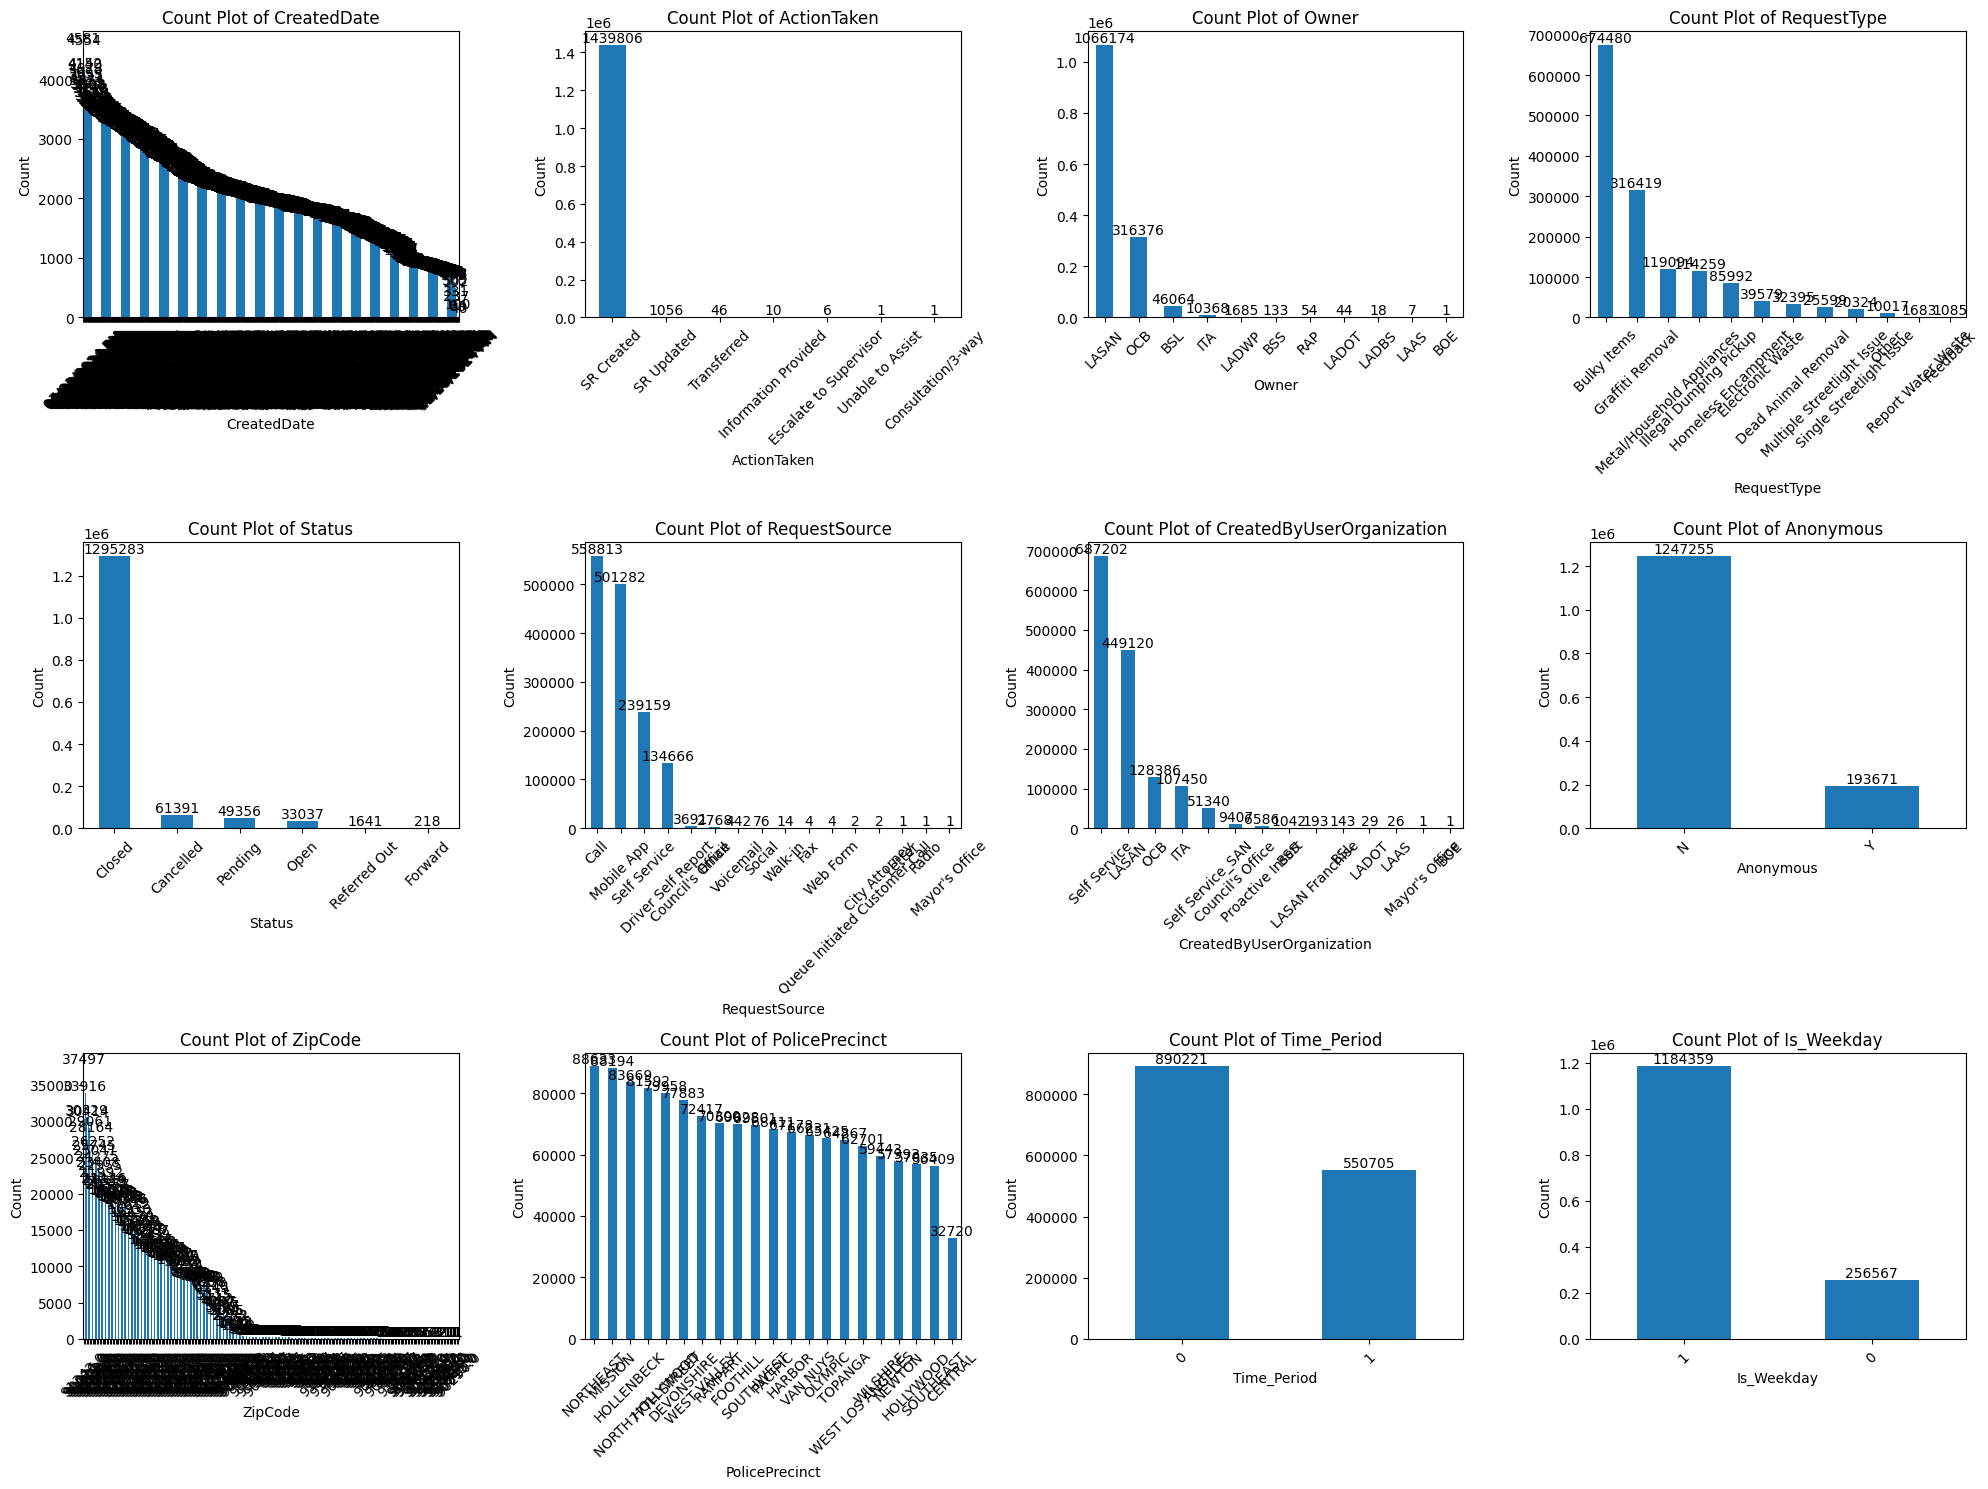

In [ ]:

num_cols = len(df.columns)
num_rows = (num_cols + 3) // 4 
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5*num_rows))
axes = axes.ravel()  

for idx, column in enumerate(df.columns):
    value_counts = df[column].value_counts()
    value_counts.plot(kind='bar', ax=axes[idx])
    axes[idx].set_title(f'Count Plot of {column}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    
    for i, v in enumerate(value_counts):
        axes[idx].text(i, v, str(v), ha='center', va='bottom')


for idx in range(len(df.columns), len(axes)):
    fig.delaxes(axes[idx])
    
plt.tight_layout()
plt.show()

In [19]:
df.drop(columns=['ActionTaken',"Owner","Status"], inplace=True)


In [ ]:
df.RequestType.value_counts()


RequestType
Bulky Items                   674480
Graffiti Removal              316419
Metal/Household Appliances    119094
Illegal Dumping Pickup        114259
Homeless Encampment            85992
Electronic Waste               39579
Dead Animal Removal            32395
Multiple Streetlight Issue     25599
Single Streetlight Issue       20324
Other                          10017
Report Water Waste              1683
Feedback                        1085
Name: count, dtype: int64

In [ ]:
df.RequestSource.value_counts()



RequestSource
Call                             558813
Mobile App                       501282
Self Service                     239159
Driver Self Report               134666
Council's Office                   3691
Email                              2768
Voicemail                           442
Social                               76
Walk-in                              14
Fax                                   4
Web Form                              4
Queue Initiated Customer Call         2
City Attorney                         2
Letter                                1
Radio                                 1
Mayor's Office                        1
Name: count, dtype: int64

In [20]:

low_freq_sources = ['Voicemail', 'Social', 'Walk-in', 'Fax', 'Web Form', 
                   'Queue Initiated Customer Call', 'City Attorney', 'Letter',
                   'Radio', "Mayor's Office"]

df['RequestSource'] = df['RequestSource'].replace(low_freq_sources, 'Other')

In [ ]:
df.CreatedByUserOrganization.value_counts()

CreatedByUserOrganization
Self Service        687202
LASAN               449120
OCB                 128386
ITA                 107450
Self Service_SAN     51340
Council's Office      9407
Proactive Insert      6586
BSS                   1042
LASAN Franchise        193
BSL                    143
LADOT                   29
LAAS                    26
Mayor's Office           1
BOE                      1
Name: count, dtype: int64

In [21]:
low_freq_organizations = ['BSS', 'LASAN Franchise', 'BSL', 'LADOT', 'LAAS', 
                         "Mayor's Office", 'BOE']

df['CreatedByUserOrganization'] = df['CreatedByUserOrganization'].replace(low_freq_organizations, 'Other')

In [ ]:
df.PolicePrecinct.value_counts()

PolicePrecinct
NORTHEAST           88633
MISSION             88194
HOLLENBECK          83669
NORTH HOLLYWOOD     81592
77TH STREET         79958
DEVONSHIRE          77883
WEST VALLEY         72417
RAMPART             70300
FOOTHILL            69928
SOUTHWEST           69501
PACIFIC             68411
HARBOR              67178
VAN NUYS            66231
OLYMPIC             65425
TOPANGA             64867
WEST LOS ANGELES    62701
WILSHIRE            59443
NEWTON              57993
HOLLYWOOD           57035
SOUTHEAST           56409
CENTRAL             32720
Name: count, dtype: int64

In [22]:
df.dropna(subset=['PolicePrecinct',"ZipCode"], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1440308 entries, 0 to 1442066
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   CreatedDate                1440308 non-null  object
 1   RequestType                1440308 non-null  object
 2   RequestSource              1440308 non-null  object
 3   CreatedByUserOrganization  1440308 non-null  object
 4   Anonymous                  1440308 non-null  object
 5   ZipCode                    1440308 non-null  object
 6   PolicePrecinct             1440308 non-null  object
 7   Time_Period                1440308 non-null  int64 
 8   Is_Weekday                 1440308 non-null  int32 
dtypes: int32(1), int64(1), object(7)
memory usage: 104.4+ MB


In [ ]:
df['ZipCode'].unique()

array([90016.0, 90710.0, 90046.0, 91335.0, 90015.0, 91342.0, 90027.0,
       91406.0, 90028.0, 90025.0, 90291.0, 90033.0, 90031.0, 91607.0,
       90049.0, 91306.0, 90018.0, 90057.0, 90068.0, 91344.0, 90012.0,
       90013.0, 91402.0, 90020.0, 91040.0, 90004.0, 90047.0, 91367.0,
       90032.0, 90019.0, 90043.0, 91311.0, 91606.0, 91324.0, 90042.0,
       90045.0, 91601.0, 91605.0, 90041.0, 90005.0, 91411.0, 90036.0,
       90048.0, 90006.0, 91307.0, 91325.0, 90248.0, 90731.0, 91042.0,
       90292.0, 90064.0, 91331.0, 90038.0, 90210.0, 90024.0, 91405.0,
       91423.0, 90732.0, 91436.0, 90293.0, 90065.0, 90062.0, 90003.0,
       91304.0, 91602.0, 90026.0, 90007.0, 91316.0, 90501.0, 91604.0,
       90034.0, 91326.0, 90037.0, 90077.0, 91356.0, 91401.0, 90035.0,
       90066.0, 91345.0, 90247.0, 90011.0, 91340.0, 90272.0, 91403.0,
       91343.0, 90230.0, 90039.0, 90021.0, 90744.0, 90044.0, 90008.0,
       91352.0, 90023.0, 90059.0, 90029.0, 90061.0, 91364.0, 91303.0,
       90063.0, 9000

In [ ]:
df.head(5)

,CreatedDate,RequestType,RequestSource,CreatedByUserOrganization,Anonymous,ZipCode,PolicePrecinct,Time_Period,Is_Weekday
0,01/01/2024 AM,Bulky Items,Call,LASAN,N,90016.0,SOUTHWEST,1,1
1,01/01/2024 AM,Multiple Streetlight Issue,Self Service,Self Service,N,90710.0,HARBOR,1,1
2,01/01/2024 AM,Single Streetlight Issue,Mobile App,Self Service,N,90046.0,WILSHIRE,1,1
3,01/01/2024 AM,Bulky Items,Mobile App,Self Service,Y,91335.0,WEST VALLEY,1,1
4,01/01/2024 AM,Graffiti Removal,Mobile App,Self Service,N,90015.0,RAMPART,1,1


In [23]:
# Remove invalid zip code values
df = df[~df['ZipCode'].isin(['0', 'VE, 0'])]
df['ZipCode'] = pd.to_numeric(df['ZipCode'], errors='coerce')
df = df[df['ZipCode'] > 0] 
df['ZipCode'] = df['ZipCode'].astype(int) 
df.ZipCode.value_counts()


C:\Users\edayd\AppData\Local\Temp\ipykernel_22892\3849845612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ZipCode'] = pd.to_numeric(df['ZipCode'], errors='coerce')


ZipCode
91342    37884
90026    34269
90011    30920
91331    30720
90003    29353
90033    28482
91335    26598
90044    26084
90019    25340
90731    24534
90004    23662
90037    23234
91406    22320
91402    21476
90018    21354
91605    21125
90006    20719
91343    20626
90042    19985
91352    19733
90027    19731
90034    19595
90016    19452
91405    19356
90744    19083
91601    19002
90065    18969
90029    18819
90047    18551
90057    18545
91606    18049
91344    17826
90043    17098
90032    16617
90031    16138
91306    15856
90023    15603
91401    15573
90066    15379
91311    14975
90291    14709
90025    14476
91304    14379
90038    14372
90062    14118
90028    13590
90007    12976
90012    12926
90021    12749
90008    12695
90015    12258
90064    12201
90002    12188
91367    11989
91325    11896
91326    11815
90039    11775
90005    11304
90045    11238
90036    11173
91356    10986
90046    10965
91604    10730
90035    10725
90020    10672
91042    10612
91

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440254 entries, 0 to 1442066
Data columns (total 9 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   CreatedDate                1440254 non-null  object
 1   RequestType                1440254 non-null  object
 2   RequestSource              1440254 non-null  object
 3   CreatedByUserOrganization  1440254 non-null  object
 4   Anonymous                  1440254 non-null  object
 5   ZipCode                    1440254 non-null  int32 
 6   PolicePrecinct             1440254 non-null  object
 7   Time_Period                1440254 non-null  int64 
 8   Is_Weekday                 1440254 non-null  int32 
dtypes: int32(2), int64(1), object(6)
memory usage: 98.9+ MB


In [24]:

df = pd.get_dummies(df, columns=['RequestType', 
                                'RequestSource',
                                'CreatedByUserOrganization',
                                'Anonymous',
                                'PolicePrecinct'], dtype=int)




In [ ]:
ZipCode_list = df['ZipCode'].unique().tolist()


In [ ]:
ZipCode_list

[90016,
 90710,
 90046,
 91335,
 90015,
 91342,
 90027,
 91406,
 90028,
 90025,
 90291,
 90033,
 90031,
 91607,
 90049,
 91306,
 90018,
 90057,
 90068,
 91344,
 90012,
 90013,
 91402,
 90020,
 91040,
 90004,
 90047,
 91367,
 90032,
 90019,
 90043,
 91311,
 91606,
 91324,
 90042,
 90045,
 91601,
 91605,
 90041,
 90005,
 91411,
 90036,
 90048,
 90006,
 91307,
 91325,
 90248,
 90731,
 91042,
 90292,
 90064,
 91331,
 90038,
 90210,
 90024,
 91405,
 91423,
 90732,
 91436,
 90293,
 90065,
 90062,
 90003,
 91304,
 91602,
 90026,
 90007,
 91316,
 90501,
 91604,
 90034,
 91326,
 90037,
 90077,
 91356,
 91401,
 90035,
 90066,
 91345,
 90247,
 90011,
 91340,
 90272,
 91403,
 91343,
 90230,
 90039,
 90021,
 90744,
 90044,
 90008,
 91352,
 90023,
 90059,
 90029,
 90061,
 91364,
 91303,
 90063,
 90002,
 91214,
 90017,
 90069,
 90014,
 90232,
 91504,
 90010,
 90058,
 90056,
 90717,
 90067,
 90001,
 90094,
 90402,
 90071,
 90302,
 90502,
 91505,
 90404,
 91510,
 90745,
 91330,
 90810,
 90212,
 91030,


In [25]:
new_df=df.copy()

In [ ]:

zip_mapping = {zip_code: i+1 for i, zip_code in enumerate(ZipCode_list)}


new_df['ZipCode'] = new_df['ZipCode'].map(zip_mapping)


In [ ]:
new_df['ZipCode'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142],
      dtype=int64)

In [26]:
new_df.fillna(0,inplace=True)
new_df = new_df.groupby(["CreatedDate",'Is_Weekday','Time_Period','ZipCode']).sum().reset_index()


In [27]:

new_df = pd.get_dummies(new_df, columns=["ZipCode"], dtype=int)

In [28]:
new_df.head()

,CreatedDate,Is_Weekday,Time_Period,RequestType_Bulky Items,RequestType_Dead Animal Removal,RequestType_Electronic Waste,RequestType_Feedback,RequestType_Graffiti Removal,RequestType_Homeless Encampment,RequestType_Illegal Dumping Pickup,RequestType_Metal/Household Appliances,RequestType_Multiple Streetlight Issue,RequestType_Other,RequestType_Report Water Waste,RequestType_Single Streetlight Issue,RequestSource_Call,RequestSource_Council's Office,RequestSource_Driver Self Report,RequestSource_Email,RequestSource_Mobile App,RequestSource_Other,RequestSource_Self Service,CreatedByUserOrganization_Council's Office,CreatedByUserOrganization_ITA,CreatedByUserOrganization_LASAN,CreatedByUserOrganization_OCB,CreatedByUserOrganization_Other,CreatedByUserOrganization_Proactive Insert,CreatedByUserOrganization_Self Service,CreatedByUserOrganization_Self Service_SAN,Anonymous_N,Anonymous_Y,PolicePrecinct_77TH STREET,PolicePrecinct_CENTRAL,PolicePrecinct_DEVONSHIRE,PolicePrecinct_FOOTHILL,PolicePrecinct_HARBOR,PolicePrecinct_HOLLENBECK,PolicePrecinct_HOLLYWOOD,PolicePrecinct_MISSION,PolicePrecinct_NEWTON,PolicePrecinct_NORTH HOLLYWOOD,PolicePrecinct_NORTHEAST,PolicePrecinct_OLYMPIC,PolicePrecinct_PACIFIC,PolicePrecinct_RAMPART,PolicePrecinct_SOUTHEAST,PolicePrecinct_SOUTHWEST,PolicePrecinct_TOPANGA,PolicePrecinct_VAN NUYS,PolicePrecinct_WEST LOS ANGELES,PolicePrecinct_WEST VALLEY,PolicePrecinct_WILSHIRE,ZipCode_90001,ZipCode_90002,ZipCode_90003,ZipCode_90004,ZipCode_90005,ZipCode_90006,ZipCode_90007,ZipCode_90008,ZipCode_90010,ZipCode_90011,ZipCode_90012,ZipCode_90013,ZipCode_90014,ZipCode_90015,ZipCode_90016,ZipCode_90017,ZipCode_90018,ZipCode_90019,ZipCode_90020,ZipCode_90021,ZipCode_90023,ZipCode_90024,ZipCode_90025,ZipCode_90026,ZipCode_90027,ZipCode_90028,ZipCode_90029,ZipCode_90031,ZipCode_90032,ZipCode_90033,ZipCode_90034,ZipCode_90035,ZipCode_90036,ZipCode_90037,ZipCode_90038,ZipCode_90039,ZipCode_90041,ZipCode_90042,ZipCode_90043,ZipCode_90044,ZipCode_90045,ZipCode_90046,ZipCode_90047,ZipCode_90048,ZipCode_90049,ZipCode_90056,ZipCode_90057,ZipCode_90058,ZipCode_90059,ZipCode_90061,ZipCode_90062,ZipCode_90063,ZipCode_90064,ZipCode_90065,ZipCode_90066,ZipCode_90067,ZipCode_90068,ZipCode_90069,ZipCode_90071,ZipCode_90073,ZipCode_90077,ZipCode_90089,ZipCode_90094,ZipCode_90210,ZipCode_90211,ZipCode_90212,ZipCode_90230,ZipCode_90232,ZipCode_90245,ZipCode_90247,ZipCode_90248,ZipCode_90272,ZipCode_90275,ZipCode_90290,ZipCode_90291,ZipCode_90292,ZipCode_90293,ZipCode_90302,ZipCode_90304,ZipCode_90305,ZipCode_90402,ZipCode_90404,ZipCode_90405,ZipCode_90501,ZipCode_90502,ZipCode_90504,ZipCode_90710,ZipCode_90717,ZipCode_90731,ZipCode_90732,ZipCode_90744,ZipCode_90745,ZipCode_90810,ZipCode_90813,ZipCode_91030,ZipCode_91040,ZipCode_91042,ZipCode_91105,ZipCode_91201,ZipCode_91205,ZipCode_91214,ZipCode_91302,ZipCode_91303,ZipCode_91304,ZipCode_91306,ZipCode_91307,ZipCode_91311,ZipCode_91316,ZipCode_91324,ZipCode_91325,ZipCode_91326,ZipCode_91330,ZipCode_91331,ZipCode_91335,ZipCode_91340,ZipCode_91342,ZipCode_91343,ZipCode_91344,ZipCode_91345,ZipCode_91352,ZipCode_91356,ZipCode_91364,ZipCode_91367,ZipCode_91401,ZipCode_91402,ZipCode_91403,ZipCode_91405,ZipCode_91406,ZipCode_91411,ZipCode_91423,ZipCode_91436,ZipCode_91504,ZipCode_91505,ZipCode_91506,ZipCode_91510,ZipCode_91601,ZipCode_91602,ZipCode_91604,ZipCode_91605,ZipCode_91606,ZipCode_91607,ZipCode_91803
0,01/01/2024 AM,1,1,3,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,4,0,2,0,0,0,0,0,0,6,0,3,3,2,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,01/01/2024 AM,1,1,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,1,0,0,0,3,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [29]:
i_df=new_df.copy()

In [ ]:
timestamps = pd.date_range(start="2025-01-01", periods=2, freq="12H")


formatted_timestamps = timestamps.strftime("%d.%m.%Y %p")
future_dates= pd.DataFrame(formatted_timestamps, columns=["CreatedDate"])
future_dates["a"]=pd.to_datetime(timestamps,format="%d.%m.%Y")

future_dates['Time_Period'] = future_dates['a'].dt.strftime('%p').map({'AM': 1, 'PM': 0})

future_dates['Is_Weekday'] = (future_dates['a'].dt.dayofweek < 5).astype(int)

future_dates.drop(columns=['a'], inplace=True)


future_dates




C:\Users\edayd\AppData\Local\Temp\ipykernel_17328\230375881.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start="2025-01-01", periods=2, freq="12H")


,CreatedDate,Time_Period,Is_Weekday
0,01.01.2025 AM,1,1
1,01.01.2025 PM,0,1


In [ ]:
zipcode_list = new_df['ZipCode'].unique()
zipcode_expanded = pd.DataFrame(np.repeat(future_dates.values, len(zipcode_list), axis=0), columns=future_dates.columns)
zipcode_expanded['ZipCode'] = np.tile(zipcode_list, len(future_dates))
future_dates=zipcode_expanded.copy()
future_dates.head()


,CreatedDate,Time_Period,Is_Weekday,ZipCode
0,01.01.2025 AM,1,1,1
1,01.01.2025 AM,1,1,2
2,01.01.2025 AM,1,1,3
3,01.01.2025 AM,1,1,4
4,01.01.2025 AM,1,1,5


In [ ]:
i_df.tail(5)

,CreatedDate,Is_Weekday,Time_Period,ZipCode,RequestType_Bulky Items,RequestType_Dead Animal Removal,RequestType_Electronic Waste,RequestType_Feedback,RequestType_Graffiti Removal,RequestType_Homeless Encampment,RequestType_Illegal Dumping Pickup,RequestType_Metal/Household Appliances,RequestType_Multiple Streetlight Issue,RequestType_Other,RequestType_Report Water Waste,RequestType_Single Streetlight Issue,RequestSource_Call,RequestSource_Council's Office,RequestSource_Driver Self Report,RequestSource_Email,RequestSource_Mobile App,RequestSource_Other,RequestSource_Self Service,CreatedByUserOrganization_Council's Office,CreatedByUserOrganization_ITA,CreatedByUserOrganization_LASAN,CreatedByUserOrganization_OCB,CreatedByUserOrganization_Other,CreatedByUserOrganization_Proactive Insert,CreatedByUserOrganization_Self Service,CreatedByUserOrganization_Self Service_SAN,Anonymous_N,Anonymous_Y,PolicePrecinct_77TH STREET,PolicePrecinct_CENTRAL,PolicePrecinct_DEVONSHIRE,PolicePrecinct_FOOTHILL,PolicePrecinct_HARBOR,PolicePrecinct_HOLLENBECK,PolicePrecinct_HOLLYWOOD,PolicePrecinct_MISSION,PolicePrecinct_NEWTON,PolicePrecinct_NORTH HOLLYWOOD,PolicePrecinct_NORTHEAST,PolicePrecinct_OLYMPIC,PolicePrecinct_PACIFIC,PolicePrecinct_RAMPART,PolicePrecinct_SOUTHEAST,PolicePrecinct_SOUTHWEST,PolicePrecinct_TOPANGA,PolicePrecinct_VAN NUYS,PolicePrecinct_WEST LOS ANGELES,PolicePrecinct_WEST VALLEY,PolicePrecinct_WILSHIRE
78429,12/31/2024 PM,1,0,106,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78430,12/31/2024 PM,1,0,107,1,0,0,0,5,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,1,0,0,0,5,0,2,4,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0
78431,12/31/2024 PM,1,0,108,0,0,0,0,2,0,3,0,0,2,0,0,0,0,0,0,6,0,1,0,2,0,0,0,0,5,0,5,2,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0
78432,12/31/2024 PM,1,0,112,4,1,0,0,0,0,2,0,0,0,0,0,7,0,0,0,0,0,0,0,1,6,0,0,0,0,0,7,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78433,12/31/2024 PM,1,0,114,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0


In [ ]:
i_df.columns

Index(['CreatedDate', 'Is_Weekday', 'Time_Period', 'ZipCode',
       'RequestType_Bulky Items', 'RequestType_Dead Animal Removal',
       'RequestType_Electronic Waste', 'RequestType_Feedback',
       'RequestType_Graffiti Removal', 'RequestType_Homeless Encampment',
       'RequestType_Illegal Dumping Pickup',
       'RequestType_Metal/Household Appliances',
       'RequestType_Multiple Streetlight Issue', 'RequestType_Other',
       'RequestType_Report Water Waste',
       'RequestType_Single Streetlight Issue', 'RequestSource_Call',
       'RequestSource_Council's Office', 'RequestSource_Driver Self Report',
       'RequestSource_Email', 'RequestSource_Mobile App',
       'RequestSource_Other', 'RequestSource_Self Service',
       'CreatedByUserOrganization_Council's Office',
       'CreatedByUserOrganization_ITA', 'CreatedByUserOrganization_LASAN',
       'CreatedByUserOrganization_OCB', 'CreatedByUserOrganization_Other',
       'CreatedByUserOrganization_Proactive Insert',
       

In [ ]:
i_df.isnull().sum()

CreatedDate                                   0
Is_Weekday                                    0
Time_Period                                   0
ZipCode                                       0
RequestType_Bulky Items                       0
RequestType_Dead Animal Removal               0
RequestType_Electronic Waste                  0
RequestType_Feedback                          0
RequestType_Graffiti Removal                  0
RequestType_Homeless Encampment               0
RequestType_Illegal Dumping Pickup            0
RequestType_Metal/Household Appliances        0
RequestType_Multiple Streetlight Issue        0
RequestType_Other                             0
RequestType_Report Water Waste                0
RequestType_Single Streetlight Issue          0
RequestSource_Call                            0
RequestSource_Council's Office                0
RequestSource_Driver Self Report              0
RequestSource_Email                           0
RequestSource_Mobile App                

In [ ]:
average_columns = ['RequestSource_Call',
       "RequestSource_Council's Office", 'RequestSource_Driver Self Report',
       'RequestSource_Email', 'RequestSource_Mobile App',
       'RequestSource_Other', 'RequestSource_Self Service',
       "CreatedByUserOrganization_Council's Office",
       'CreatedByUserOrganization_ITA', 'CreatedByUserOrganization_LASAN',
       'CreatedByUserOrganization_OCB', 'CreatedByUserOrganization_Other',
       'CreatedByUserOrganization_Proactive Insert',
       'CreatedByUserOrganization_Self Service',
       'CreatedByUserOrganization_Self Service_SAN', 'Anonymous_N',
       'Anonymous_Y', 'PolicePrecinct_77TH STREET', 'PolicePrecinct_CENTRAL',
       'PolicePrecinct_DEVONSHIRE', 'PolicePrecinct_FOOTHILL',
       'PolicePrecinct_HARBOR', 'PolicePrecinct_HOLLENBECK',
       'PolicePrecinct_HOLLYWOOD', 'PolicePrecinct_MISSION',
       'PolicePrecinct_NEWTON', 'PolicePrecinct_NORTH HOLLYWOOD',
       'PolicePrecinct_NORTHEAST', 'PolicePrecinct_OLYMPIC',
       'PolicePrecinct_PACIFIC', 'PolicePrecinct_RAMPART',
       'PolicePrecinct_SOUTHEAST', 'PolicePrecinct_SOUTHWEST',
       'PolicePrecinct_TOPANGA', 'PolicePrecinct_VAN NUYS',
       'PolicePrecinct_WEST LOS ANGELES', 'PolicePrecinct_WEST VALLEY',
       'PolicePrecinct_WILSHIRE']


averages = i_df.groupby(['Time_Period', 'Is_Weekday', 'ZipCode'])[average_columns].mean().reset_index()
future_dates = future_dates.merge(averages, on=['Time_Period', 'Is_Weekday', 'ZipCode'], how='left')


future_dates.fillna(0,inplace=True)








In [ ]:
i_df.isnull().count()

CreatedDate                                   78434
Is_Weekday                                    78434
Time_Period                                   78434
ZipCode                                       78434
RequestType_Bulky Items                       78434
RequestType_Dead Animal Removal               78434
RequestType_Electronic Waste                  78434
RequestType_Feedback                          78434
RequestType_Graffiti Removal                  78434
RequestType_Homeless Encampment               78434
RequestType_Illegal Dumping Pickup            78434
RequestType_Metal/Household Appliances        78434
RequestType_Multiple Streetlight Issue        78434
RequestType_Other                             78434
RequestType_Report Water Waste                78434
RequestType_Single Streetlight Issue          78434
RequestSource_Call                            78434
RequestSource_Council's Office                78434
RequestSource_Driver Self Report              78434
RequestSourc

In [ ]:

future_datess = pd.concat([i_df, future_dates], ignore_index=True)

In [ ]:
future_datess.head(30)

,CreatedDate,Is_Weekday,Time_Period,ZipCode,RequestType_Bulky Items,RequestType_Dead Animal Removal,RequestType_Electronic Waste,RequestType_Feedback,RequestType_Graffiti Removal,RequestType_Homeless Encampment,RequestType_Illegal Dumping Pickup,RequestType_Metal/Household Appliances,RequestType_Multiple Streetlight Issue,RequestType_Other,RequestType_Report Water Waste,RequestType_Single Streetlight Issue,RequestSource_Call,RequestSource_Council's Office,RequestSource_Driver Self Report,RequestSource_Email,RequestSource_Mobile App,RequestSource_Other,RequestSource_Self Service,CreatedByUserOrganization_Council's Office,CreatedByUserOrganization_ITA,CreatedByUserOrganization_LASAN,CreatedByUserOrganization_OCB,CreatedByUserOrganization_Other,CreatedByUserOrganization_Proactive Insert,CreatedByUserOrganization_Self Service,CreatedByUserOrganization_Self Service_SAN,Anonymous_N,Anonymous_Y,PolicePrecinct_77TH STREET,PolicePrecinct_CENTRAL,PolicePrecinct_DEVONSHIRE,PolicePrecinct_FOOTHILL,PolicePrecinct_HARBOR,PolicePrecinct_HOLLENBECK,PolicePrecinct_HOLLYWOOD,PolicePrecinct_MISSION,PolicePrecinct_NEWTON,PolicePrecinct_NORTH HOLLYWOOD,PolicePrecinct_NORTHEAST,PolicePrecinct_OLYMPIC,PolicePrecinct_PACIFIC,PolicePrecinct_RAMPART,PolicePrecinct_SOUTHEAST,PolicePrecinct_SOUTHWEST,PolicePrecinct_TOPANGA,PolicePrecinct_VAN NUYS,PolicePrecinct_WEST LOS ANGELES,PolicePrecinct_WEST VALLEY,PolicePrecinct_WILSHIRE
0,01/01/2024 AM,1,1,1,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1,01/01/2024 AM,1,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01/01/2024 AM,1,1,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,01/01/2024 AM,1,1,4,11.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,5.0,0.0,4.0,0.0,0.0,6.0,0.0,0.0,0.0,7.0,2.0,11.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0
4,01/01/2024 AM,1,1,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,01/01/2024 AM,1,1,6,6.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,9.0,0.0,10.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,01/01/2024 AM,1,1,7,10.0,0.0,0.0,0.0,8.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,3.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,01/01/2024 AM,1,1,8,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
8,01/01/2024 AM,1,1,9,6.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,01/01/2024 AM,1,1,10,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,8.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,9.0,1.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0


In [ ]:
len(future_dates)

284

In [ ]:
len(future_datess)

78718

In [30]:
i_df=i_df.drop("CreatedDate",axis=1)

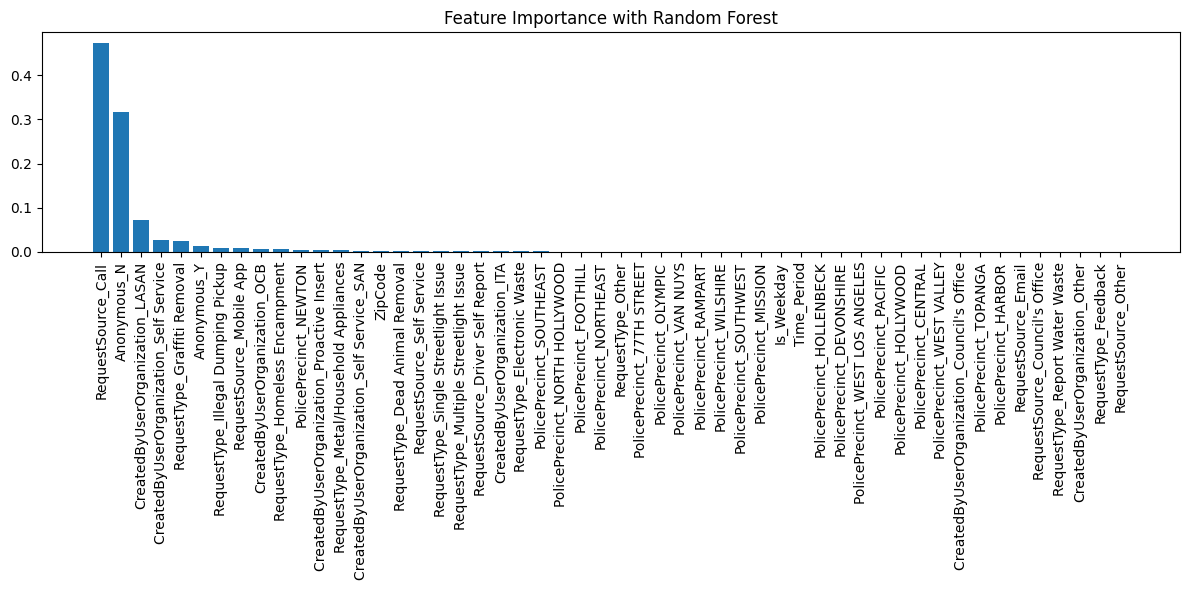

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
X = i_df.drop(["RequestType_Bulky Items"], axis=1)  # Features (all columns except the second)
y = i_df["RequestType_Bulky Items"]                  # Target (the second column)

# Train-Test Split (optional but recommended)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns

# Plotting Feature Importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance with Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
top_indices = np.argsort(importances)[::-1][:10]


top_features = feature_names[top_indices]


df_top_features = df[top_features.tolist() + [df.columns[1]]]


print(df_top_features.head())

   RequestSource_Call  Anonymous_N  CreatedByUserOrganization_LASAN  \
0                   1            1                                1   
1                   0            1                                0   
2                   0            1                                0   
3                   0            0                                0   
4                   0            1                                0   

   CreatedByUserOrganization_Self Service  RequestType_Graffiti Removal  \
0                                       0                             0   
1                                       1                             0   
2                                       1                             0   
3                                       1                             0   
4                                       1                             1   

   Anonymous_Y  RequestType_Illegal Dumping Pickup  RequestSource_Mobile App  \
0            0                            

In [ ]:

zip_mapping = {zip_code: i+1 for i, zip_code in enumerate(ZipCode_list)}


df_top_features['ZipCode'] = df_top_features['ZipCode'].map(zip_mapping)


C:\Users\edayd\AppData\Local\Temp\ipykernel_17328\505542318.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_features['ZipCode'] = df_top_features['ZipCode'].map(zip_mapping)


In [ ]:
df_top_features.ZipCode.head(10)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    7
9    7
Name: ZipCode, dtype: int64

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.1, 1))
new_df_scaled = pd.DataFrame(scaler.fit_transform(i_df), columns=i_df.columns)

In [32]:
new_df_scaled.sample(5)

,Is_Weekday,Time_Period,RequestType_Bulky Items,RequestType_Dead Animal Removal,RequestType_Electronic Waste,RequestType_Feedback,RequestType_Graffiti Removal,RequestType_Homeless Encampment,RequestType_Illegal Dumping Pickup,RequestType_Metal/Household Appliances,RequestType_Multiple Streetlight Issue,RequestType_Other,RequestType_Report Water Waste,RequestType_Single Streetlight Issue,RequestSource_Call,RequestSource_Council's Office,RequestSource_Driver Self Report,RequestSource_Email,RequestSource_Mobile App,RequestSource_Other,RequestSource_Self Service,CreatedByUserOrganization_Council's Office,CreatedByUserOrganization_ITA,CreatedByUserOrganization_LASAN,CreatedByUserOrganization_OCB,CreatedByUserOrganization_Other,CreatedByUserOrganization_Proactive Insert,CreatedByUserOrganization_Self Service,CreatedByUserOrganization_Self Service_SAN,Anonymous_N,Anonymous_Y,PolicePrecinct_77TH STREET,PolicePrecinct_CENTRAL,PolicePrecinct_DEVONSHIRE,PolicePrecinct_FOOTHILL,PolicePrecinct_HARBOR,PolicePrecinct_HOLLENBECK,PolicePrecinct_HOLLYWOOD,PolicePrecinct_MISSION,PolicePrecinct_NEWTON,PolicePrecinct_NORTH HOLLYWOOD,PolicePrecinct_NORTHEAST,PolicePrecinct_OLYMPIC,PolicePrecinct_PACIFIC,PolicePrecinct_RAMPART,PolicePrecinct_SOUTHEAST,PolicePrecinct_SOUTHWEST,PolicePrecinct_TOPANGA,PolicePrecinct_VAN NUYS,PolicePrecinct_WEST LOS ANGELES,PolicePrecinct_WEST VALLEY,PolicePrecinct_WILSHIRE,ZipCode_90001,ZipCode_90002,ZipCode_90003,ZipCode_90004,ZipCode_90005,ZipCode_90006,ZipCode_90007,ZipCode_90008,ZipCode_90010,ZipCode_90011,ZipCode_90012,ZipCode_90013,ZipCode_90014,ZipCode_90015,ZipCode_90016,ZipCode_90017,ZipCode_90018,ZipCode_90019,ZipCode_90020,ZipCode_90021,ZipCode_90023,ZipCode_90024,ZipCode_90025,ZipCode_90026,ZipCode_90027,ZipCode_90028,ZipCode_90029,ZipCode_90031,ZipCode_90032,ZipCode_90033,ZipCode_90034,ZipCode_90035,ZipCode_90036,ZipCode_90037,ZipCode_90038,ZipCode_90039,ZipCode_90041,ZipCode_90042,ZipCode_90043,ZipCode_90044,ZipCode_90045,ZipCode_90046,ZipCode_90047,ZipCode_90048,ZipCode_90049,ZipCode_90056,ZipCode_90057,ZipCode_90058,ZipCode_90059,ZipCode_90061,ZipCode_90062,ZipCode_90063,ZipCode_90064,ZipCode_90065,ZipCode_90066,ZipCode_90067,ZipCode_90068,ZipCode_90069,ZipCode_90071,ZipCode_90073,ZipCode_90077,ZipCode_90089,ZipCode_90094,ZipCode_90210,ZipCode_90211,ZipCode_90212,ZipCode_90230,ZipCode_90232,ZipCode_90245,ZipCode_90247,ZipCode_90248,ZipCode_90272,ZipCode_90275,ZipCode_90290,ZipCode_90291,ZipCode_90292,ZipCode_90293,ZipCode_90302,ZipCode_90304,ZipCode_90305,ZipCode_90402,ZipCode_90404,ZipCode_90405,ZipCode_90501,ZipCode_90502,ZipCode_90504,ZipCode_90710,ZipCode_90717,ZipCode_90731,ZipCode_90732,ZipCode_90744,ZipCode_90745,ZipCode_90810,ZipCode_90813,ZipCode_91030,ZipCode_91040,ZipCode_91042,ZipCode_91105,ZipCode_91201,ZipCode_91205,ZipCode_91214,ZipCode_91302,ZipCode_91303,ZipCode_91304,ZipCode_91306,ZipCode_91307,ZipCode_91311,ZipCode_91316,ZipCode_91324,ZipCode_91325,ZipCode_91326,ZipCode_91330,ZipCode_91331,ZipCode_91335,ZipCode_91340,ZipCode_91342,ZipCode_91343,ZipCode_91344,ZipCode_91345,ZipCode_91352,ZipCode_91356,ZipCode_91364,ZipCode_91367,ZipCode_91401,ZipCode_91402,ZipCode_91403,ZipCode_91405,ZipCode_91406,ZipCode_91411,ZipCode_91423,ZipCode_91436,ZipCode_91504,ZipCode_91505,ZipCode_91506,ZipCode_91510,ZipCode_91601,ZipCode_91602,ZipCode_91604,ZipCode_91605,ZipCode_91606,ZipCode_91607,ZipCode_91803
30654,1.0,1.0,0.129412,0.100000,0.100,0.1,0.102663,0.104206,0.100000,0.100000,0.100000,0.1,0.1,0.118,0.1288,0.1,0.1,0.1,0.107143,0.1,0.107459,0.1,0.128125,0.133333,0.1,0.1,0.1,0.108511,0.1,0.110098,0.102163,0.1,0.1,0.1,0.100000,0.1,0.1,0.1,0.1,0.1,0.15473,0.1,0.1,0.100000,0.1,0.1000,0.1,0.1,0.100000,0.1,0.100000,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.

In [33]:
new_dataset = new_df_scaled.drop(columns=['RequestType_Graffiti Removal'])
Dataset = new_dataset.values
Labels = new_df_scaled[['RequestType_Graffiti Removal']].values

In [34]:
import numpy as np

def create_sequences_with_gap(data, labels, n_past, n_future, gap):
    X, y = [], []
    for i in range(n_past, len(data) - n_future - gap + 1):
        # Input sequence: past n_past data points
        X.append(data[i - n_past:i])

        # Target: skip 'gap' days and predict for 'n_future' days
        y.append(labels[i + gap:i + gap + n_future])

    return np.array(X), np.array(y)

# Parameters
n_past = 100   # Number of past time steps
n_future = 7   # Number of future time steps to predict
gap = 7        # Gap between input sequence and target

# Create sequences
X, y = create_sequences_with_gap(Dataset, Labels, n_past, n_future, gap)

# Check the shapes
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (78321, 100, 193), y shape: (78321, 7, 1)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)


In [37]:
# Import Libraries and packages from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

In [38]:
from keras.regularizers import l1

# Initializing the Neural Network based on LSTM
model = Sequential()

# Adding 1st LSTM layer
model.add(LSTM(units=32, return_sequences=True, input_shape=(100, X_train.shape[2])))

model.add(LSTM(units=64, return_sequences=True))

model.add(LSTM(units=128, return_sequences=True))
#model.add(Dropout(0.15))


model.add(LSTM(units=64, return_sequences=True))
#model.add(Dropout(0.15))

model.add(LSTM(units=32, return_sequences=False))

# Adding Dropout
model.add(Dropout(0.15))

# Output layer
model.add(Dense(units=7, activation='linear',kernel_regularizer=l1(0.0001)))


# Compiling the Neural Network
model.compile(optimizer = Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()

c:\Users\edayd\anaconda3\envs\A31011\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 32)        │        28,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 64)        │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,631 (838.40 KB)

 Trainable params: 214,631 (838.40 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os

log_dir = r'C:\Users\edayd\OneDrive\Masaüstü\LosAngels\logs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
    print(f"{log_dir} klasörü oluşturuldu.")


In [39]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=50, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath=r'C:\Users\edayd\OneDrive\Masaüstü\LosAngels\logs.weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)




history = model.fit(X_train, y_train, epochs=200, shuffle=False, callbacks=[es, rlr,mcp], validation_split=0.25, verbose=1, batch_size=32)

Epoch 1/200
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 0.0025
Epoch 1: val_loss improved from inf to 0.00024, saving model to C:\Users\edayd\OneDrive\Masaüstü\LosAngels\logs.weights.h5
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 237s 156ms/step - loss: 0.0025 - val_loss: 2.4459e-04 - learning_rate: 0.0010
Epoch 2/200
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 1.3766e-04
Epoch 2: val_loss did not improve from 0.00024
1469/1469 ━━━━━━━━━━━━━━━━━━━━ 226s 154ms/step - loss: 1.3769e-04 - val_loss: 2.4536e-04 - learning_rate: 0.0010
Epoch 3/200
 518/1469 ━━━━━━━━━━━━━━━━━━━━ 2:59 189ms/step - loss: 1.1731e-04

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices('GPU'))


GPU available: []


In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
future_datesss = future_datess.drop("CreatedDate",axis=1)


import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0.1, 1))
future_datesss = pd.DataFrame(scaler.fit_transform(future_datesss), columns=future_datesss.columns)
